Yafet Abraham Mekonnen

## Predicting passenger survival on the *Titanic*

Based on the [*Titanic - Machine Learning from Disaster*](https://www.kaggle.com/c/titanic) challenge from [Kaggle](https://www.kaggle.com/).
The dataset is from the [Vanderbilt Biostatistics Datasets](https://hbiostat.org/data/).

## Overview

In this challenge you will use machine learning to create a model that predicts which passengers survived the *Titanic* shipwreck.

The sinking of the *Titanic* is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered "unsinkable" *RMS Titanic* sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, you will build a predictive model that answers the question: "What are the attributes of the people who were more likely to survive the sinking of the *Titanic*?" using passenger data (*i.e.* name, age, gender, socio-economic class, *etc.*).

## Data

The dataset file details include:

*   `pclass`: passenger class; proxy for socio-economic status (1st ~ upper, 2nd ~ middle, 3rd ~ lower)
*   `survived`: survival status (0=No, 1=Yes)
*   `name`: passenger name
*   `sex`: passenger sex (male, female)
*   `age`: passenger age in years (fractional if age is less than 1; if age is estimated, it is in the form xx.5)
*   `sibsp`: number of siblings/spouses aboard (includes step-siblings; mistresses and fiances ignored)
*   `parch`: number of parents/children aboard (parent only considers mother or father; child includes stepchildren)
*   `ticket`: ticket number
*   `fare`: passenger fare (in pre-1970 British pounds)
*   `cabin`: cabin number
*   `embarked`: port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)
*   `boat`: lifeboat number (if passenger boarded one)
*   `body`: body identification number
*   `home.dest`: passenger home/destination



# Solution

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [60]:
url = "https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv"
df = pd.read_csv(url)
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [61]:
df.isnull().sum()


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Above it can be seen that features like age, fare, cabin, embarked, boat, body, and home.dest have missing values. 

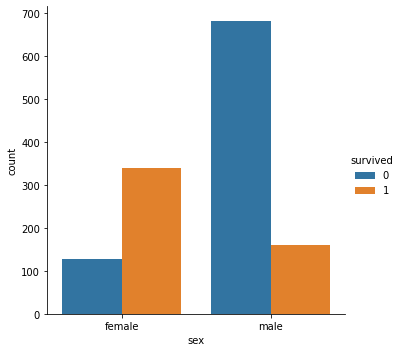

In [62]:
sns.catplot(x ="sex", hue ="survived", kind ="count", data = df)



The graph above clearly shows that most male passengers did not survive the shipwreck comparing it with female passengers. Most of the passengers that survived were female.  

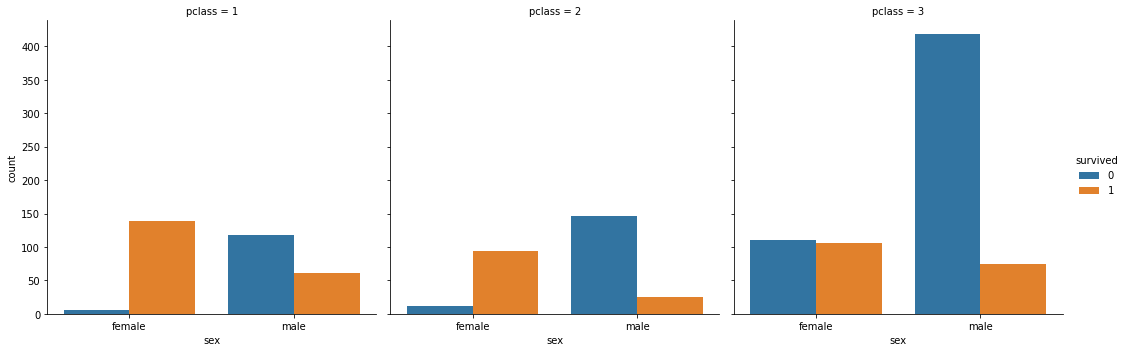

In [63]:
sns.catplot(x ='sex', hue ='survived', kind ='count', col ='pclass', data = df)

The above graph also indicates that most of the male passengers did not survive. In addition, this graph provides more information about the socio-economic status where the lowest socio-economic class specifically the male having the highest death rate, and females in all socio-economic status have a lower death rate.  

In [64]:
mean_age = df['age'].mean()
df['age'].fillna(mean_age,inplace=True)  # this code fill all the na with mean 


In the code above for the age feature, there are 263 missing values I chose to replace these with the mean value. 

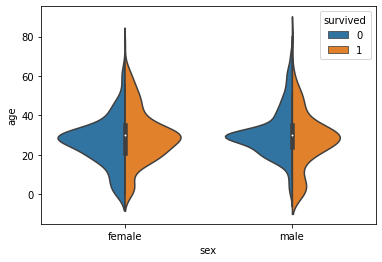

In [65]:
sns.violinplot(x ="sex", y ="age", hue ="survived", data = df, split = True)

The graph above shows that in both genders most children within the age of 0 to 10 survived and the majority age group that did not survive is in the age between 20 to 40 in both genders, a male has more death rate in this group, but the death rate becomes less for both men and women as the age increase.

The use of Logistic regression is used to model the probability of a certain class or event in this case survived and not survived since it is used to evaluate a binary classifier.

In [66]:
sex_numerical = pd.get_dummies(df['sex'],drop_first=True) # convert the sex column to numeric 
df['Sex_Numerical'] = sex_numerical   # insert into the datasets
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Sex_Numerical
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


The above code changes the sex features from categorical variable to numerical variable because I want to use the sex features in the logistic regression model. Where a female is represented as 0 and a male is represented as 1.  

In [67]:
df.drop(['name','sex','ticket','cabin','embarked','boat','home.dest','body'], axis=1,inplace=True)  # drop all these 


I chose to drop these features above because they would not help with the use of creating a logistic regression model.

In [68]:
df.dtypes  #check the type
df.head() # only numberic vaules are there 


,pclass,survived,age,sibsp,parch,fare,Sex_Numerical
0,1,1,29.00,0,0,211.3375,0
1,1,1,0.92,1,2,151.5500,1
2,1,0,2.00,1,2,151.5500,0
3,1,0,30.00,1,2,151.5500,1
4,1,0,25.00,1,2,151.5500,0


In [69]:
mean_fare = df['fare'].mean()  # replace all the na of fare 
df['fare'].fillna(mean_fare,inplace=True)  # this code fill all the na with mean 



Since there was 1 fare missing value I chose to replace that with the mean value

In [70]:
corr = df.corr()
print(df.corr().abs().nlargest(5, 'survived').index) 


Index(['survived', 'Sex_Numerical', 'pclass', 'fare', 'parch'], dtype='object')


In the code above it print the top 4 feature with the highest correlation with survived feature using the correlation matrix. The correlation matrix above indicates that the top 4 features which are sex_numberical ,  pclass, fare, and parch have the highest correlation with survived. Which means these 4 are the best feature to use to create the model 




In [71]:
Indep_v = df[['Sex_Numerical', 'pclass', 'fare', 'parch']]   
dep_v = df['survived']
Indep_v

,Sex_Numerical,pclass,fare,parch
0,0,1,211.3375,0
1,1,1,151.5500,2
2,0,1,151.5500,2
3,1,1,151.5500,2
4,0,1,151.5500,2
...,...,...,...,...
1304,0,3,14.4542,0
1305,0,3,14.4542,0
1306,1,3,7.2250,0
1307,1,3,7.2250,0


In [72]:
Indep_train,Indep_test,dep_train,dep_test = train_test_split(Indep_v, dep_v,test_size = 0.33,random_state = 42) 
lr=LogisticRegression()
lr.fit(Indep_train,dep_train)





LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
predict = lr.predict(Indep_test)
t = confusion_matrix(dep_test,predict)
#creating table from our confusion_matrix
pd.DataFrame(t,columns=['Predict_no', 'Predict_yes'],index= ['Actual_no', 'Actual_yes'])


,Predict_no,Predict_yes
Actual_no,222,32
Actual_yes,59,119


 According to the confusion matrix table above the model predicted 222 passengers to not survive and 119 to survive which matches with the actual but comparing with the actual data 59 passengers were predicted not to survive however they survived, and 32 were predicted to survive but did not.  

In [74]:
report = classification_report(dep_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       254
           1       0.79      0.67      0.72       178

    accuracy                           0.79       432
   macro avg       0.79      0.77      0.78       432
weighted avg       0.79      0.79      0.79       432



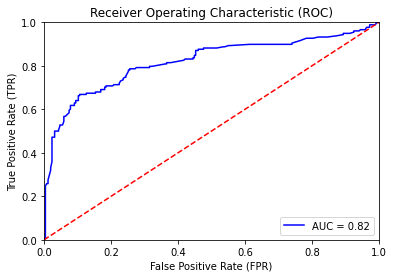

In [75]:
probs = lr.predict_proba(Indep_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(dep_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

Using the highest four features from the correlation matrix 82% of area under the curve was calculated by plotting the Receiver Operating Characteristic (ROC) using the random classifier where the model was above it. 

In [76]:
print(df.corr().abs().nlargest(4, 'survived').index) 
#trying with three highest corrleated features 
Indep_v = df[['pclass','Sex_Numerical', 'fare']]   
dep_v = df['survived']
Indep_v

Index(['survived', 'Sex_Numerical', 'pclass', 'fare'], dtype='object')


,pclass,Sex_Numerical,fare
0,1,0,211.3375
1,1,1,151.5500
2,1,0,151.5500
3,1,1,151.5500
4,1,0,151.5500
...,...,...,...
1304,3,0,14.4542
1305,3,0,14.4542
1306,3,1,7.2250
1307,3,1,7.2250


Lets now try to make our model  better by only taking the top three to get a higher area of the curve

In [77]:
Indep_train,Indep_test,dep_train,dep_test = train_test_split(Indep_v, dep_v,test_size = 0.33,random_state = 42) 
lr.fit(Indep_train,dep_train)
predict = lr.predict(Indep_test)

t = confusion_matrix(dep_test,predict)
pd.DataFrame(t,columns=['Predict_no', 'Predict_yes'],index= ['Actual_no', 'Actual_yes'])



,Predict_no,Predict_yes
Actual_no,222,32
Actual_yes,58,120


Now the confusion matrix got a little better by changing the predict yes and actual yes from 119 to 120 and predict no and actual yes from 59 and 58 


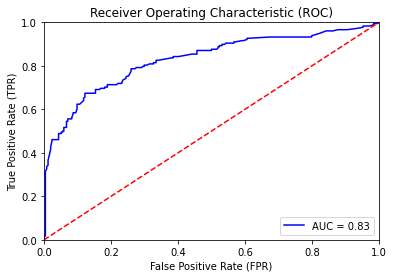

In [78]:
probs = lr.predict_proba(Indep_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(dep_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

The area under the curve now increased by one percent when I only chose the top 3 highest correlated features using the correlation matrix 

In [79]:
Inter_three_feat = lr.intercept_
Coeff_three_feat = lr.coef_

print("Intercept " + str(Inter_three_feat))
print("Intercept of first " + str(Inter_three_feat[0]))

print("All three Coefficent " + str(Coeff_three_feat))
print("First Coefficent " + str(Coeff_three_feat[0][0]))
print("Second  Coefficent " + str(Coeff_three_feat[0][1]))
print("Third Coefficent "+ str(Coeff_three_feat[0][2]))

Intercept [2.54916363]
Intercept of first 2.549163632076046
All three Coefficent [[-7.95853886e-01 -2.34932982e+00  2.26253195e-03]]
First Coefficent -0.7958538863181297
Second  Coefficent -2.3493298168120718
Third Coefficent 0.0022625319496057204


We have three Coefficients since I chose the three features with the highest correlation with survival using the correlation metrics. 

In [80]:
def sigmoid_three(p_class_v_three,sex_numerical_v_three,fare_v_three):
    return (1 / (1 +
        np.exp(-(Inter_three_feat[0] +
        ( Coeff_three_feat[0][0]*p_class_v_three) +(Coeff_three_feat[0][1]*sex_numerical_v_three) + (Coeff_three_feat[0][2] * fare_v_three)))))

sigmoid_three(3,1,4)*100 # lower social-econmic class and male who paid 4 British pounds 



10.168164501992493

The above result shows that males in lower social-economic class who paid 4 British pounds probability of surviving which is around 10.2% 

In [81]:
sigmoid_three(1,0,500)*100  # high social ecominc class and female who paid 500 pound 

94.70786714619929

The above result shows that female in high economic class who paid 500 pound has 94.7% of surviving 

In [82]:
print(df.corr().abs().nlargest(3, 'survived').index)                                                       
Indep_v = df[['pclass','Sex_Numerical']]              
dep_v = df['survived']
Indep_v

Index(['survived', 'Sex_Numerical', 'pclass'], dtype='object')


,pclass,Sex_Numerical
0,1,0
1,1,1
2,1,0
3,1,1
4,1,0
...,...,...
1304,3,0
1305,3,0
1306,3,1
1307,3,1


Lets now try to make the model even better by only taking the top two to get a higher area of the curve  


In [83]:
Indep_train,Indep_test,dep_train,dep_test = train_test_split(Indep_v, dep_v,test_size = 0.33,random_state = 42) 
lr.fit(Indep_train,dep_train)
predict = lr.predict(Indep_test)
t = confusion_matrix(dep_test,predict)
pd.DataFrame(t,columns=['Predict_no', 'Predict_yes'],index= ['Actual_no', 'Actual_yes'])



,Predict_no,Predict_yes
Actual_no,222,32
Actual_yes,59,119


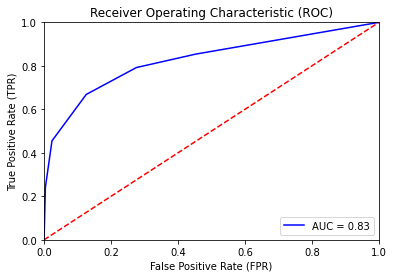

In [84]:
probs = lr.predict_proba(Indep_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(dep_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

There was no change in area under the curve when I chose the top two features best correlated for the survival rate number from the correlation matrix. 

In [85]:
Inter = lr.intercept_
Coeff = lr.coef_
Coeff
print("Intercept " + str(Inter))
print("All two Coefficent " + str(Coeff))
print("First Coefficent " + str(Coeff[0][0]))
print("Second Coefficent " + str(Coeff[0][1]))


Intercept [2.80098606]
All two Coefficent [[-0.86829091 -2.3743203 ]]
First Coefficent -0.8682909062327991
Second Coefficent -2.3743203012510277


We have two Coefficients since there are two features with the highest correlation with survival using the correlation metrics.

In [86]:
def sigmoid_two(p_class_v,sex_numerical_v):
    return (1 / (1 +
        np.exp(-(Inter[0] +
        ( Coeff[0][0]*p_class_v) +(Coeff[0][1]*sex_numerical_v)))))


sigmoid_two(3,1)*100  # lower social-econmic class and male  

10.172465336718691

The above result tells indicate that male that is in the lower social-economic class have 10.17% chance of survival. 

In [87]:
sigmoid_two(1,0)*100 # upper social-econmic class and female 

87.35474329727836

The above result indicates that females in the upper social-economic class have an 87.35% chance of surviving.  